In [1]:
!pip install ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.1/1.1 MB 68.1 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import torch

import logging

# –ü–æ–ª—É—á–∞–µ–º –ª–æ–≥–≥–µ—Ä Ultralytics
ultralytics_logger = logging.getLogger("ultralytics")

# –£—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–µ–º —É—Ä–æ–≤–µ–Ω—å INFO (—á—Ç–æ–±—ã –≤–∏–¥–µ—Ç—å –æ–±—É—á–µ–Ω–∏–µ)
ultralytics_logger.setLevel(logging.INFO)

# –î–æ–±–∞–≤–ª—è–µ–º —Ñ–∏–ª—å—Ç—Ä, –∫–æ—Ç–æ—Ä—ã–π –±—É–¥–µ—Ç –æ—Ç–±—Ä–∞—Å—ã–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ WARNING –ø—Ä–æ Video stream
class IgnoreVideoWarning(logging.Filter):
    def filter(self, record):
        return "Video stream unresponsive" not in record.getMessage()

ultralytics_logger.addFilter(IgnoreVideoWarning())

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joelacht","key":"77a0a18e3f8f5f83cb7a1363836b23d8"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d siddharthkumarsah/ships-in-aerial-images

Dataset URL: https://www.kaggle.com/datasets/siddharthkumarsah/ships-in-aerial-images
License(s): CC-BY-SA-4.0
 93% 328M/353M [00:00<00:00, 636MB/s]
100% 353M/353M [00:00<00:00, 650MB/s]


In [ ]:
!mkdir ships-in-aerial-images

In [ ]:
!unzip ships-in-aerial-images.zip -d ships-in-aerial-images

–í—ã—Ö–æ–¥–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ –±—ã–ª–∏ –æ–±—Ä–µ–∑–∞–Ω—ã –¥–æ –Ω–µ—Å–∫–æ–ª—å–∫–∏—Ö –ø–æ—Å–ª–µ–¥–Ω–∏—Ö —Å—Ç—Ä–æ–∫ (5000).
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0593_png.rf.33fd03bd0d9896e31b73ac56c1e458c8.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0594_png.rf.1a86349573567a368a653b5b39fff4af.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0594_png.rf.ff6551627101ade7c4ecd6887fa45546.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0595_png.rf.bc03f4a3bc686c5d239d8552ce57b5f5.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0597_png.rf.918ed233995c3645a1ca8d14bf35a81c.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0598_png.rf.94d8be92f98bf3ff36cf9f51b1e17bc9.txt  
  inflating: ships-in-aerial-images/ships-aerial-images/train/labels/x0598_png.rf.a5b224c7880ba832c9d6d5aba3123e28.txt  
  inflating: ships-in-aerial-imag

In [ ]:
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
DEVICE

'cuda'

In [ ]:
model = YOLO("yolo11m.pt")

In [ ]:
results = model.predict("https://cdnn21.img.ria.ru/images/75491/67/754916727_11:0:3552:1992_650x0_80_0_0_720ce86a7c6b5afe847b4e532db93dce.jpg", conf=0.5)


image 1/1 /content/754916727_11:0:3552:1992_650x0_80_0_0_720ce86a7c6b5afe847b4e532db93dce.jpg: 384x640 1 person, 2 boats, 112.4ms
Speed: 12.8ms preprocess, 112.4ms inference, 386.6ms postprocess per image at shape (1, 3, 384, 640)


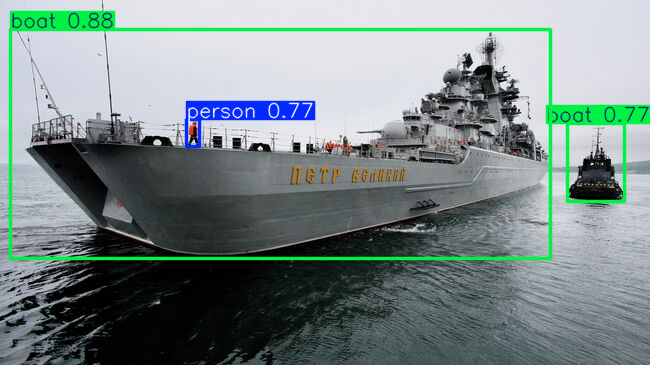

In [ ]:
# Process results list
for result in results:
    boxes = result.boxes  # bbox –Ω—É–∂–µ–Ω –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏
    masks = result.masks  # –ú–∞—Å–∫–∞ –Ω—É–∂–Ω–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
    keypoints = result.keypoints  # –î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–∑—ã
    probs = result.probs  # –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
    obb = result.obb  # –û—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π bbox
    result.show()  # display to screen

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
results = model.train(
    data="/content/ships-in-aerial-images/ships-aerial-images/data.yaml",
    epochs=30,         # 30‚Äì50 —ç–ø–æ—Ö: 30 –¥–ª—è —Å–∫–æ—Ä–æ—Å—Ç–∏, 50 –µ—Å–ª–∏ –Ω—É–∂–Ω–æ –∫–∞—á–µ—Å—Ç–≤–æ
    imgsz=512,         # —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–π —Ä–∞–∑–º–µ—Ä
    batch=16,          # T4 —Å–ø–æ–∫–æ–π–Ω–æ —Ç—è–Ω–µ—Ç 32, –∏–Ω–æ–≥–¥–∞ –¥–∞–∂–µ 64
    device=DEVICE,          # –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å GPU
    workers=2,         # 2‚Äì4 –ø–æ—Ç–æ–∫–∞ –∑–∞–≥—Ä—É–∑–∫–∏ –¥–∞–Ω–Ω—ã—Ö
    optimizer="AdamW", # –±—ã—Å—Ç—Ä–µ–µ —Å—Ö–æ–¥–∏–º–æ—Å—Ç—å, —á–µ–º SGD
    lr0=0.002,         # –ø–æ–Ω–∏–∂–µ –Ω–∞—á–∞–ª—å–Ω—ã–π LR (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é 0.01 –¥–ª—è SGD)
    lrf=0.01,          # –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–π LR = 1% –æ—Ç –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ
    patience=15,       # —Ä–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞
    cos_lr=True,       # –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ –∑–∞—Ç—É—Ö–∞–Ω–∏–µ LR (–æ–±—ã—á–Ω–æ –ª—É—á—à–µ)
    augment=True       # –≤–∫–ª—é—á–∞–µ–º –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
)

Ultralytics 8.3.202 üöÄ Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/ships-in-aerial-images/ships-aerial-images/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=512, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.002, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=15, per

In [ ]:
url = "0__20161103_195523_0c27__-122-32811063986814_37-73760632632476_png.rf.f813612d65f137d904b255581efd6795.jpg"

results = model.predict(url, conf=0.6)


image 1/1 /content/0__20161103_195523_0c27__-122-32811063986814_37-73760632632476_png.rf.f813612d65f137d904b255581efd6795.jpg: 512x512 (no detections), 319.4ms
Speed: 2.1ms preprocess, 319.4ms inference, 0.6ms postprocess per image at shape (1, 3, 512, 512)


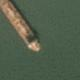

In [ ]:
for result in results:
    boxes = result.boxes  # bbox –Ω—É–∂–µ–Ω –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏
    masks = result.masks  # –ú–∞—Å–∫–∞ –Ω—É–∂–Ω–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
    keypoints = result.keypoints  # –î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–∑—ã
    probs = result.probs  # –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
    obb = result.obb  # –û—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π bbox
    result.show()  # display to screen

In [ ]:
model = YOLO("/content/runs/detect/train/weights/best.pt")

In [ ]:
model.train(
    data="/content/ships-in-aerial-images/ships-aerial-images/data.yaml",
    epochs=20,
    imgsz=416,
    batch=16,
    device=DEVICE,
)

Ultralytics 8.3.202 üöÄ Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/ships-in-aerial-images/ships-aerial-images/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/runs/detect/train/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, ov

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79e5156855e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
model = YOLO("/content/runs/detect/train2/weights/best.pt")

In [ ]:
url = "0__20161103_195523_0c27__-122-32811063986814_37-73760632632476_png.rf.f813612d65f137d904b255581efd6795.jpg"

results = model.predict(url)


image 1/1 /content/0__20161103_195523_0c27__-122-32811063986814_37-73760632632476_png.rf.f813612d65f137d904b255581efd6795.jpg: 416x416 (no detections), 21.9ms
Speed: 1.4ms preprocess, 21.9ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)


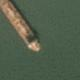

In [ ]:
for result in results:
    boxes = result.boxes  # bbox –Ω—É–∂–µ–Ω –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏
    masks = result.masks  # –ú–∞—Å–∫–∞ –Ω—É–∂–Ω–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
    keypoints = result.keypoints  # –î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–∑—ã
    probs = result.probs  # –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
    obb = result.obb  # –û—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π bbox
    result.show()  # display to screen

In [ ]:
results = model.train(
    data="/content/ships-in-aerial-images/ships-aerial-images/data.yaml",
    epochs=40,             # –µ—â—ë 40 —ç–ø–æ—Ö (–æ–±—â–µ–µ –≤—Ä–µ–º—è ‚âà 80‚Äì90)
    imgsz=640,             # —É–≤–µ–ª–∏—á–∏—Ç—å –¥–æ 640 –¥–ª—è –ª—É—á—à–µ–≥–æ –¥–µ—Ç–µ–∫—Ç–∞ –º–µ–ª–∫–∏—Ö –æ–±—ä–µ–∫—Ç–æ–≤
    batch=16,              # –æ—Å—Ç–∞–≤–∏—Ç—å 16 (T4 –≤—ã–¥–µ—Ä–∂–∏—Ç, 32 —É–∂–µ —Ä–∏—Å–∫ OOM)
    device=DEVICE,
    workers=2,             # 2‚Äì4 –Ω–æ—Ä–º–∞–ª—å–Ω–æ –¥–ª—è Colab
    optimizer="AdamW",     # —Ö–æ—Ä–æ—à–æ —Å—Ö–æ–¥–∏—Ç—Å—è
    lr0=0.001,             # –ø–æ–Ω–∏–∂–µ learning rate
    lrf=0.01,              # —Ñ–∏–Ω–∞–ª—å–Ω—ã–π LR = 1% –æ—Ç –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ
    cos_lr=True,           # –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ –∑–∞—Ç—É—Ö–∞–Ω–∏–µ
    patience=20,           # —Ä–∞–Ω–Ω—è—è –æ—Å—Ç–∞–Ω–æ–≤–∫–∞
    augment=True,          # –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏ ON
    mosaic=1.0,            # –æ—Å—Ç–∞–≤–∏—Ç—å mosaic –≤–∫–ª—é—á—ë–Ω–Ω—ã–º (–ø–æ–º–æ–≥–∞–µ—Ç –Ω–∞ –º–µ–ª–∫–∏—Ö –æ–±—ä–µ–∫—Ç–∞—Ö)
    mixup=0.1,             # –¥–æ–±–∞–≤–∏—Ç—å —á—É—Ç—å-—á—É—Ç—å mixup (—Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–∏–µ)
    hsv_h=0.015, hsv_s=0.7, hsv_v=0.4,  # —Ü–≤–µ—Ç–æ–≤—ã–µ –∞—É–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
    scale=0.5,             # —É–≤–µ–ª–∏—á–∏–≤–∞—Ç—å/—É–º–µ–Ω—å—à–∞—Ç—å –º–∞—Å—à—Ç–∞–± (—á—Ç–æ–±—ã –∫–æ—Ä–∞–±–ª–∏ –±—ã–ª–∏ –∏ –∫—Ä—É–ø–Ω–µ–µ, –∏ –º–µ–ª—å—á–µ)
    fliplr=0.5,            # –≥–æ—Ä–∏–∑–æ–Ω—Ç–∞–ª—å–Ω—ã–µ —Ñ–ª–∏–ø—ã
    flipud=0.2             # –≤–µ—Ä—Ç–∏–∫–∞–ª—å–Ω—ã–µ —Ñ–ª–∏–ø—ã (–∞–∫—Ç—É–∞–ª—å–Ω–æ –¥–ª—è –∞—ç—Ä–æ—Ñ–æ—Ç–æ)
)

Ultralytics 8.3.202 üöÄ Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/ships-in-aerial-images/ships-aerial-images/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=40, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.2, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=/content/runs/detect/train2/weights/best.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, o

In [3]:
model = YOLO("/content/best.pt")

In [10]:
url = "6bb03cf77_jpg.rf.4fccfd266380d395c56061218598f076.jpg"

results = model.predict(url)


image 1/1 /content/6bb03cf77_jpg.rf.4fccfd266380d395c56061218598f076.jpg: 416x416 (no detections), 22.8ms
Speed: 2.0ms preprocess, 22.8ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)


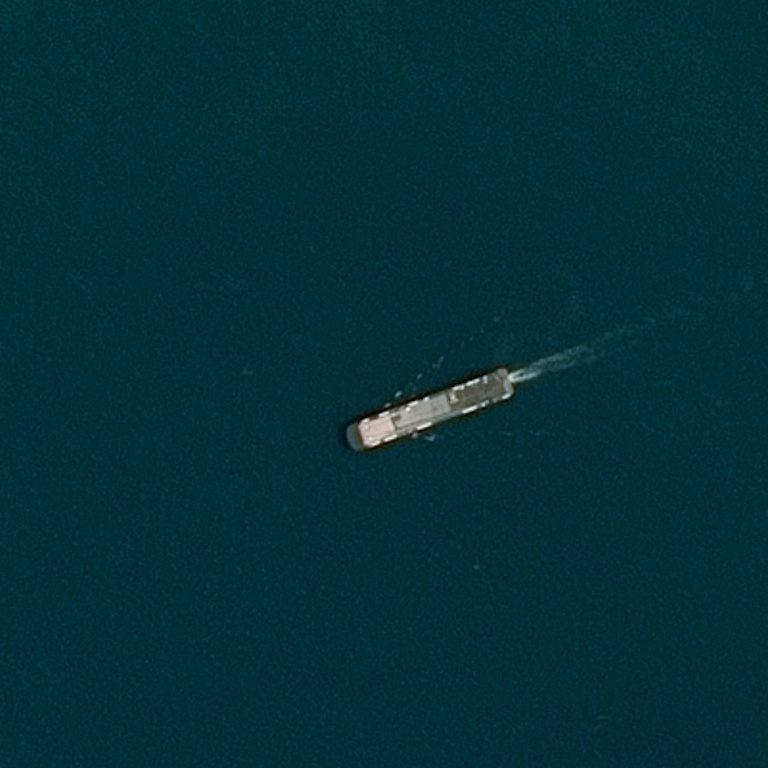

In [5]:
for result in results:
    boxes = result.boxes  # bbox –Ω—É–∂–µ–Ω –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏
    masks = result.masks  # –ú–∞—Å–∫–∞ –Ω—É–∂–Ω–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
    keypoints = result.keypoints  # –î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–∑—ã
    probs = result.probs  # –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
    obb = result.obb  # –û—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π bbox
    result.show()  # display to screen

In [6]:
url = "images.jpg"

results = model.predict(url)


image 1/1 /content/images.jpg: 256x416 1 ship, 86.8ms
Speed: 1.4ms preprocess, 86.8ms inference, 210.1ms postprocess per image at shape (1, 3, 256, 416)


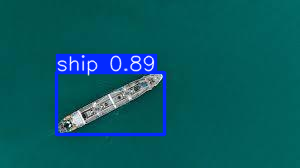

In [7]:
for result in results:
    boxes = result.boxes  # bbox –Ω—É–∂–µ–Ω –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏
    masks = result.masks  # –ú–∞—Å–∫–∞ –Ω—É–∂–Ω–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
    keypoints = result.keypoints  # –î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–∑—ã
    probs = result.probs  # –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
    obb = result.obb  # –û—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π bbox
    result.show()  # display to screen

In [8]:
url = "aerial-view-ship-sea_1048944-14013140.jpg"

results = model.predict(url)


image 1/1 /content/aerial-view-ship-sea_1048944-14013140.jpg: 288x416 1 ship, 48.7ms
Speed: 1.2ms preprocess, 48.7ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 416)


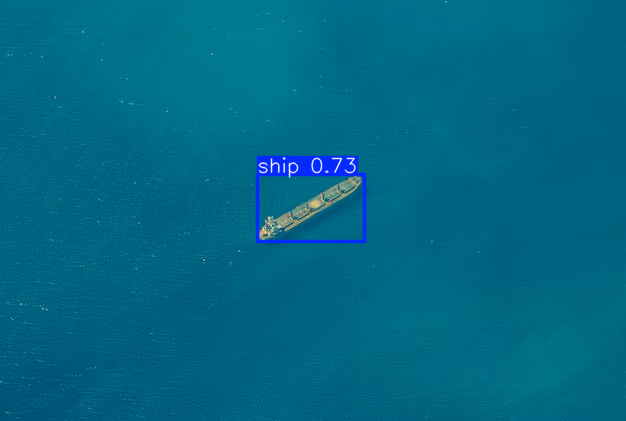

In [9]:
for result in results:
    boxes = result.boxes  # bbox –Ω—É–∂–µ–Ω –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏
    masks = result.masks  # –ú–∞—Å–∫–∞ –Ω—É–∂–Ω–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
    keypoints = result.keypoints  # –î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–∑—ã
    probs = result.probs  # –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
    obb = result.obb  # –û—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π bbox
    result.show()  # display to screen

In [11]:
url = "images1.jpg"

results = model.predict(url)


image 1/1 /content/images1.jpg: 320x416 1 ship, 54.1ms
Speed: 1.7ms preprocess, 54.1ms inference, 2.2ms postprocess per image at shape (1, 3, 320, 416)


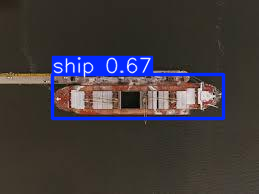

In [12]:
for result in results:
    boxes = result.boxes  # bbox –Ω—É–∂–µ–Ω –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏
    masks = result.masks  # –ú–∞—Å–∫–∞ –Ω—É–∂–Ω–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
    keypoints = result.keypoints  # –î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–∑—ã
    probs = result.probs  # –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
    obb = result.obb  # –û—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π bbox
    result.show()  # display to screen

In [13]:
url = "29e57baa1_jpg.rf.5e47bff1999c5c32a9904f09d2ffe4d8.jpg"

results = model.predict(url)


image 1/1 /content/29e57baa1_jpg.rf.5e47bff1999c5c32a9904f09d2ffe4d8.jpg: 416x416 3 ships, 22.8ms
Speed: 2.1ms preprocess, 22.8ms inference, 3.1ms postprocess per image at shape (1, 3, 416, 416)


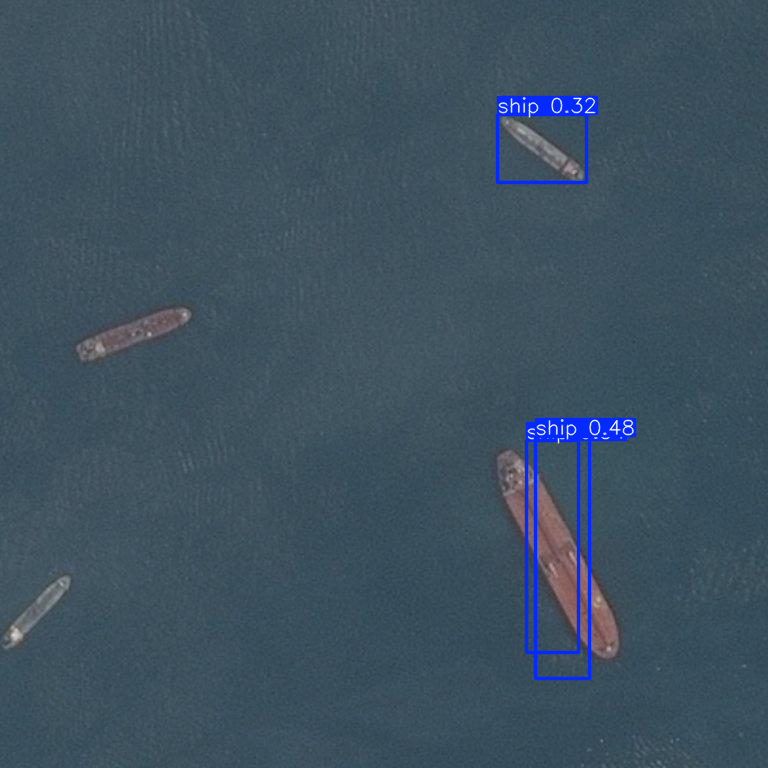

In [14]:
for result in results:
    boxes = result.boxes  # bbox –Ω—É–∂–µ–Ω –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏
    masks = result.masks  # –ú–∞—Å–∫–∞ –Ω—É–∂–Ω–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
    keypoints = result.keypoints  # –î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–∑—ã
    probs = result.probs  # –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
    obb = result.obb  # –û—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π bbox
    result.show()  # display to screen

In [15]:
url = "high-angle-view-crane-swimming-blue-sea_1048944-4882188.jpg"

results = model.predict(url)


image 1/1 /content/high-angle-view-crane-swimming-blue-sea_1048944-4882188.jpg: 288x416 1 ship, 17.0ms
Speed: 1.8ms preprocess, 17.0ms inference, 1.8ms postprocess per image at shape (1, 3, 288, 416)


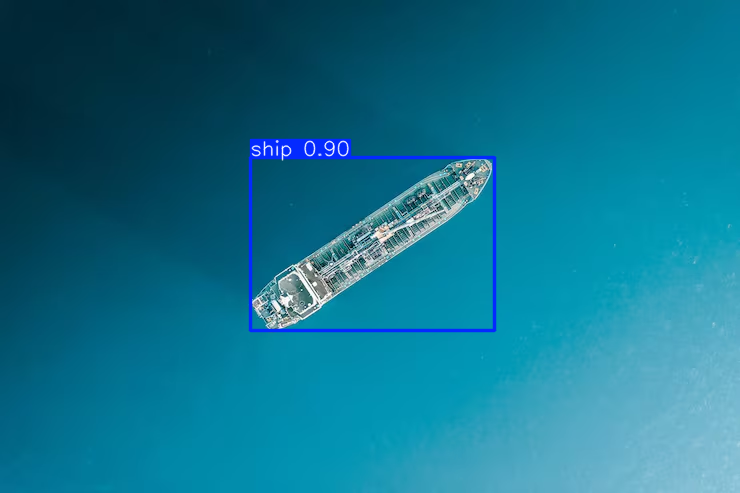

In [16]:
for result in results:
    boxes = result.boxes  # bbox –Ω—É–∂–µ–Ω –¥–ª—è –¥–µ—Ç–µ–∫—Ü–∏–∏
    masks = result.masks  # –ú–∞—Å–∫–∞ –Ω—É–∂–Ω–∞ –¥–ª—è —Å–µ–≥–º–µ–Ω—Ç–∞—Ü–∏–∏
    keypoints = result.keypoints  # –î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–æ–∑—ã
    probs = result.probs  # –î–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –Ω–∞–π–¥–µ–Ω–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞
    obb = result.obb  # –û—Ä–∏–µ–Ω—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π bbox
    result.show()  # display to screen